In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in data

In [14]:
df = pd.read_excel('data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


## Correcting data types

In order to prepare the data for exploratory analysis, we are going to correct the datatypes such that they are easily usable by plotting functions.

In [15]:
df.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

In [16]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

Sort data by stages to make it easier to analyze later.

In [98]:
std_stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO']
stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO', 
'Acquired', 'Private Equity …', 'Subsidi…', 'Unknown']

df["Stage_i"] = df["Stage"].apply(lambda x: stages.index(x))
df = df.sort_values(by=["Stage_i"])

Distribution of company size (given by in stage and funding) - Matthew

In [99]:
df["Money_Raised_in_$_mil"] = df["Money_Raised_in_$_mil"].apply(lambda x: float(str(x).replace("$","")))

c:\Users\Steam\miniconda3\envs\cogs108\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Count'>

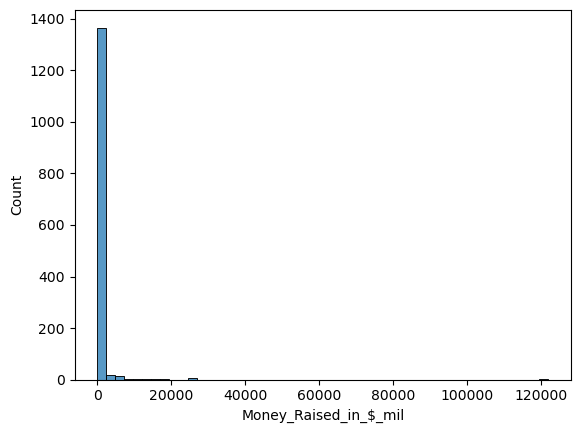

In [100]:
# sns.barplot(x="Company", y="Money_Raised_in_$_mil", data=df.sort_values(by="Money_Raised_in_$_mil"))
sns.histplot(x="Money_Raised_in_$_mil", bins=50, data=df)
# df.describe()
# note that majority of companies have funding within a really small range.

c:\Users\Steam\miniconda3\envs\cogs108\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Count'>

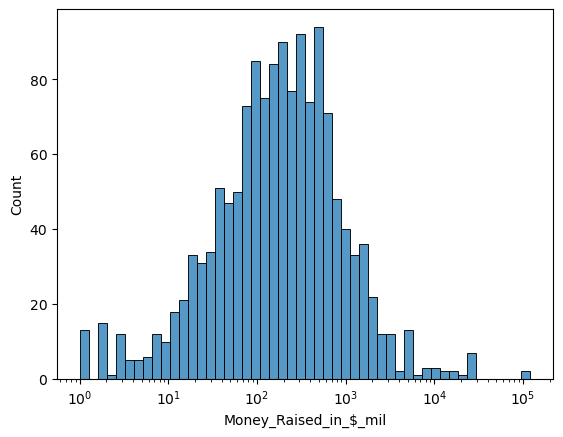

In [101]:
sns.histplot(x="Money_Raised_in_$_mil", bins=50, data=df, log_scale=True)
# well it looks like a cool bell curve when i make it log scale so awesome!!!
# idk what the implications are.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

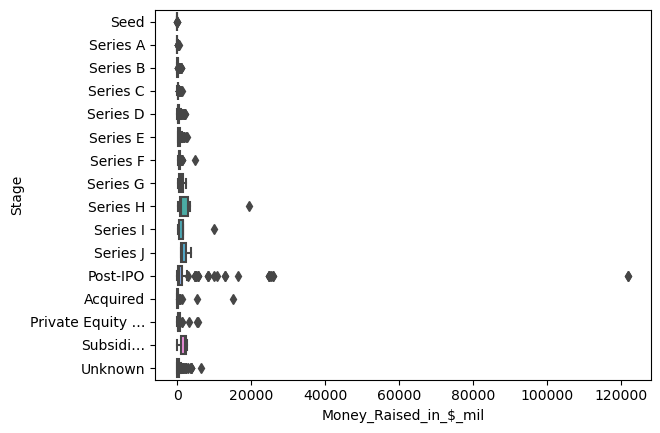

In [102]:
# df["Stage"].unique()

sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df)

Note: post ipo has a large value which makes this plot hard to read!!!
i will remove it temporarily.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

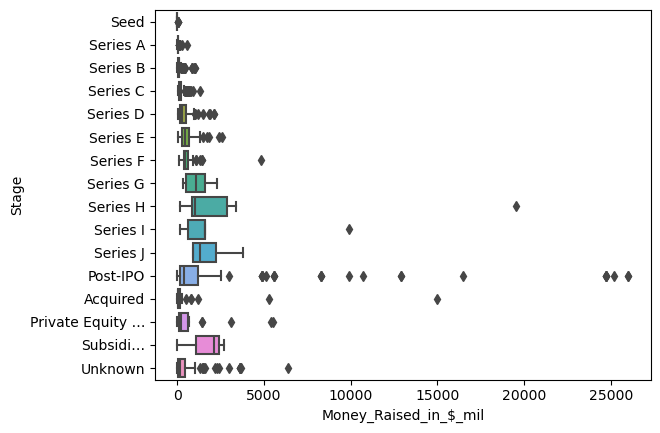

In [103]:
sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df[df["Money_Raised_in_$_mil"] < 100000])

Still kind of annoying, what if we remove outliers completely?

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

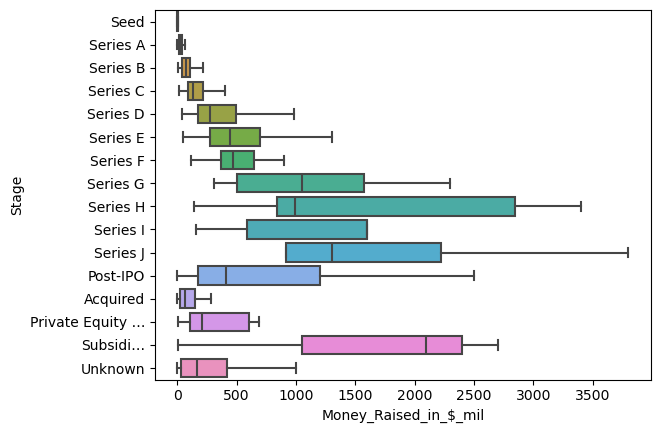

In [104]:
sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df, showfliers=False)

I guess this shows what rounds of funding -> how much money u raise.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Company_Size_before_Layoffs'>

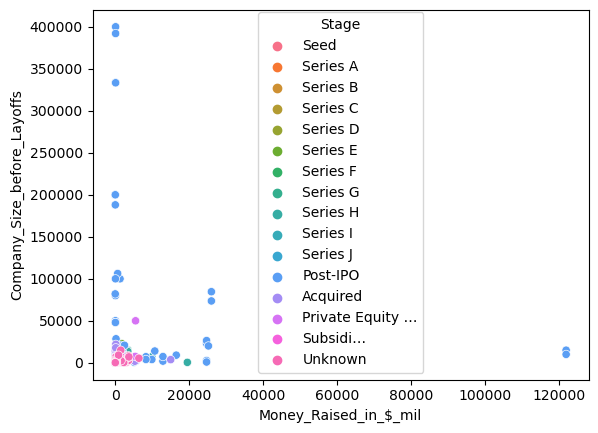

In [105]:
sns.scatterplot(x="Money_Raised_in_$_mil", y="Company_Size_before_Layoffs", hue="Stage", data=df)

Same thing but with normal stages (seed -> series -> post IPO) and log scale.
Note that a company can have any number of series stages before reaching post-IPO. Which is why we may see some high-series stages having more company size / money raised than post-ipo companies

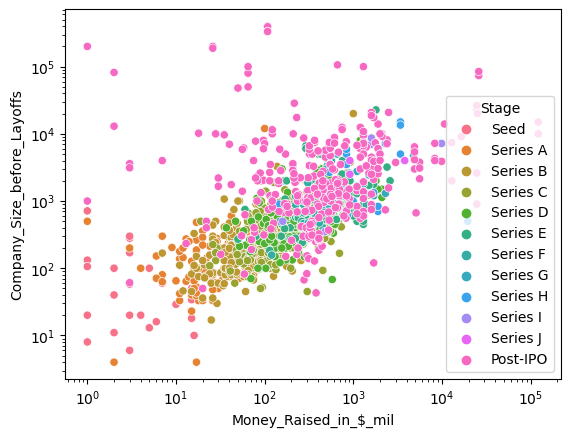

In [106]:
sns.scatterplot(x="Money_Raised_in_$_mil", y="Company_Size_before_Layoffs", hue="Stage", data=df[df["Stage"].isin(std_stages)])
plt.xscale("log")
plt.yscale("log")

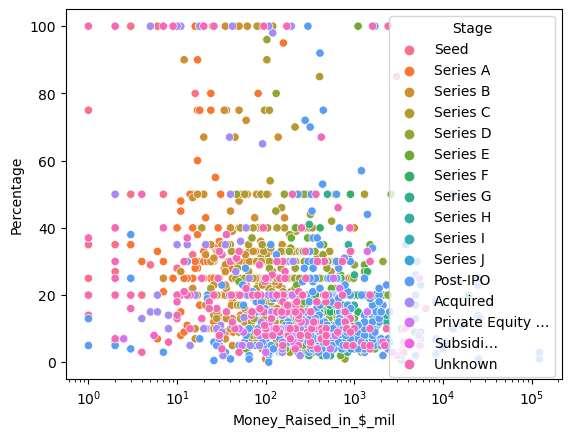

In [107]:
sns.scatterplot(x="Money_Raised_in_$_mil", y="Percentage", hue="Stage", data=df)
plt.xscale("log")
# doesnt make sense for yscale to be log too as it is a percentage

All the above plot really shows is that the more money the company has, the lower percentage of employees that will be laid off (duh.)